In [1]:
import tensorflow as tf
import pickle
import gzip
import numpy as np
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
PROB=0.3

In [3]:
with gzip.open("data/mnist.pkl.gz") as f:
    data=pickle.load(f)

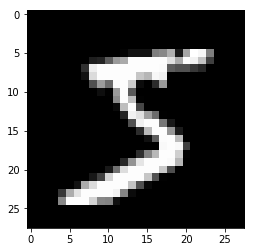

In [4]:
imshow((data[0][0][0]).reshape((28,28)), cmap="gray")

In [5]:
train, valida, test = data

In [6]:
trainNoise = np.random.binomial(1, PROB, train[0].shape) * train[0]

In [7]:
testNoise = np.random.binomial(1, PROB, test[0].shape) * test[0]

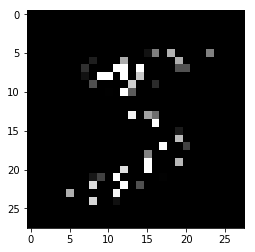

In [8]:
imshow(trainNoise[0].reshape((28,28)), cmap="gray")

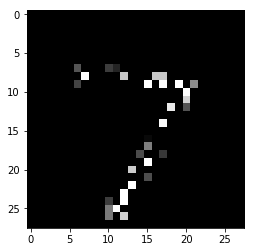

In [9]:
imshow(testNoise[0].reshape((28,28)), cmap="gray")

In [10]:
def model(Xnoise):
    W1 = tf.get_variable("W1", shape=[28*28, 1024],
                     initializer=tf.contrib.layers.xavier_initializer())
    b1 = tf.Variable(tf.zeros([1024]))
    Y = tf.sigmoid( tf.matmul(Xnoise, W1) + b1 )
    #W2 = tf.get_variable("W2", shape=[1024, 28*28],
    #                 initializer=tf.contrib.layers.xavier_initializer())
    b2 = tf.Variable(tf.zeros([28*28]))
    Z = tf.sigmoid( tf.matmul(Y, tf.transpose(W1)) + b2 )
    return (Z, Y)

In [11]:
def cost(Z, X):
    LH = - tf.reduce_sum(X * tf.log(Z) + (1.0-X) * tf.log(1.0-Z), axis=1)
    return LH /tf.cast(tf.shape(Z)[0], tf.float32)

In [12]:
Xnoise = tf.placeholder(tf.float32, shape=[None, 28*28], name = "Xnoise")
X = tf.placeholder(tf.float32, shape=[None, 28*28], name = "X")

In [13]:
Z, Y = model(Xnoise)
c = cost(Z, X)

In [14]:
train_step = tf.train.AdamOptimizer().minimize(c)

In [15]:
sess = tf.Session()

In [16]:
sess.run(tf.global_variables_initializer())
for _ in range(1000):
    sess.run(train_step, feed_dict={Xnoise : trainNoise, X: train[0]})
z0=sess.run(Z, feed_dict={Xnoise: testNoise[0].reshape((1, 784))})

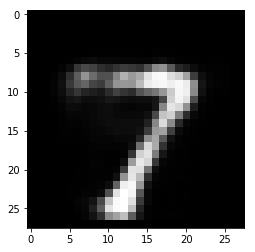

In [17]:
imshow(z0.reshape((28,28)), cmap="gray")

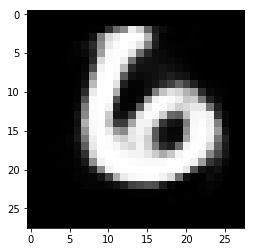

In [18]:
z0=sess.run(Z, feed_dict={Xnoise: test[0][100].reshape((1, 784))})
imshow(z0.reshape((28,28)), cmap="gray")

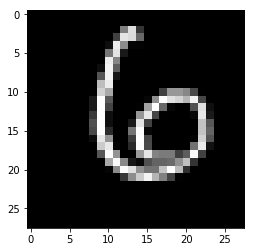

In [19]:
imshow(test[0][100].reshape((28,28)), cmap="gray")